In [17]:
import pandas as pd

In [21]:
df = pd.read_excel('poweroutage.xlsx').head(2000)


In [22]:
df = df[['content']]

In [24]:
df.head(10)

,content
0,Frozen out: Minorities suffered four times mor...
1,Leaked recording reveals Texas will not overha...
2,"@GregAbbott_TX @RepKevinBrady Hey Governor, wh..."
3,@MayorAdler @GregAbbott_TX Not to mention #txl...
4,👇🏼 Meanwhile the TX GOP-GQP LEGISLATURE #txleg...
5,When our power grid crashed(was shut off) in t...
6,"ERCOT possibly entering emergency conditions, ..."
7,Hey GOP TEXAS LEGISLATURE! \n \nSHOW the PEOPL...
8,"When the power went out, Texas oil and gas reg..."
9,Texans cite multiple causes of storm power out...


In [25]:
import re 
def clean_data(Tweets):
    count = 0

    Tweets_cleaned = []

    # rules for elements being eliminated from the tweets
    r_at = r'@[A-Za-z0-9_]+'  # Removing @ from all tweets
    r_hash = r'#[A-Za-z0-9_]+' # Removing hash tags
    r_rt = r'RT '  # Removing RT i.e. if the tweet is a retweet
    r_emoji = '[^a-zA-Z]'  # Removing emoji and replacing with space
    #r_brandtag=r'#'+brand.lower()
    
    tokens=[]
    r_se = r'[:]]'
    r_se2 = r'[=)]'
    r_se3 = r'[:-D]'
    r_se4 = r'[:D]'
    r_se5 = r'[=D]'
    r_se6 = r'[:)]'

    r_sae2 = r'[:(]'
    r_sae3 = r'[:[]'
    r_sae4 = r'[=(]'
    
    r_ae = r'[>:(]'
    r_ae2 = r'[>:(]'
    
    r_le = r'[(y)]'
    r_le2 = r'[(Y)]'
    
    for t in Tweets:
        
        
        clean_tweets = re.sub(r'|'.join((r_at, r_rt)),'',t)  
        
        clean_tweets = re.sub('https?:[A-Za-z0-9./]+','URL',clean_tweets)
        clean_tweets = re.sub(r_hash, ' ', clean_tweets)
        clean_tweets = re.sub(r_emoji, ' ', clean_tweets)
        clean_tweets = re.sub('[\s ]+', ' ',clean_tweets)
        clean_tweets = clean_tweets.lower()
        

        

        Tweets_cleaned.append(clean_tweets)

    return Tweets_cleaned#, tokens

In [27]:
cleaned_sentences = clean_data(list(df['content']))
cleaned_sentences[0:10]

['frozen out minorities suffered four times more power outages in texas blackouts url',
 'leaked recording reveals texas will not overhaul electricity grid after deaths url ',
 ' hey governor what are you doing to modernize our state s electric grid url',
 ' not to mention ramming discriminatory bills amp ammendments in the middle of the night of which the public has yet to read priorities ',
 ' meanwhile the tx gop gqp legislature is ramming voter suppression bills in the middle of the night amp provide no public viewing of the bills amp amendments priorities url',
 'when our power grid crashed was shut off in the it wasn t the first sign our unregulated system was a failure now they want texas folks to use less ac as texas heat rises return our system to the public sector url',
 'ercot possibly entering emergency conditions what could go wrong really url',
 'hey gop texas legislature show the people what you ve done we already know you re not doing a damn thing about what s actually 

# Zero shot classifier for labelling the dataset

In [28]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification")

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
labels = []
count=0
for i in cleaned_sentences:
    candidate_labels = ['Suffered','Not Suffered']
    result = classifier(i, candidate_labels)
    labels.append(result['labels'][0])
    print(result['labels'][0])
    count+=1
    if count>3000:
        break

Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered

Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffer

Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Not Suffered
Not Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered
Suffered

In [34]:
len(labels)

2000

In [35]:
df['labels'] = labels

# Final dataset after labelling

In [37]:
df.head(50)

,content,labels
0,Frozen out: Minorities suffered four times mor...,Suffered
1,Leaked recording reveals Texas will not overha...,Suffered
2,"@GregAbbott_TX @RepKevinBrady Hey Governor, wh...",Suffered
3,@MayorAdler @GregAbbott_TX Not to mention #txl...,Suffered
4,👇🏼 Meanwhile the TX GOP-GQP LEGISLATURE #txleg...,Suffered
5,When our power grid crashed(was shut off) in t...,Suffered
6,"ERCOT possibly entering emergency conditions, ...",Suffered
7,Hey GOP TEXAS LEGISLATURE! \n \nSHOW the PEOPL...,Suffered
8,"When the power went out, Texas oil and gas reg...",Suffered
9,Texans cite multiple causes of storm power out...,Suffered


In [82]:
df['labels'] = df['labels'].apply(lambda x : "Not_Suffered" if x == 'Not Suffered' else 'Suffered')

# Count Vectorizer

In [84]:

from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=200)
# X = matrix.fit_transform(Xdoc).toarray()
X = matrix.fit_transform(list(df['content'])).toarray()

In [85]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]]


In [103]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['labels'],test_size=0.50)

# Naive Bayes 

In [104]:

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# predict class
y_pred = classifier.predict(X_test)


print(y_test[5:15])
print(y_pred[5:15])

1321        Suffered
441         Suffered
981         Suffered
1873    Not_Suffered
1318        Suffered
490         Suffered
407         Suffered
1614        Suffered
264         Suffered
1734        Suffered
Name: labels, dtype: object
['Suffered' 'Suffered' 'Suffered' 'Suffered' 'Suffered' 'Suffered'
 'Suffered' 'Suffered' 'Suffered' 'Suffered']


In [105]:


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


print('Training score:',classifier.score(X_train, y_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
print(cr)

Training score: 0.917
Test accuracy: 0.905


              precision    recall  f1-score   support

Not_Suffered       0.06      0.11      0.08        35
    Suffered       0.97      0.93      0.95       965

    accuracy                           0.91      1000
   macro avg       0.51      0.52      0.51      1000
weighted avg       0.93      0.91      0.92      1000



In [106]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [107]:
df['labels']

0           Suffered
1           Suffered
2           Suffered
3           Suffered
4           Suffered
            ...     
1995        Suffered
1996    Not_Suffered
1997        Suffered
1998        Suffered
1999        Suffered
Name: labels, Length: 2000, dtype: object

In [108]:
pd.unique(df['labels'])

array(['Suffered', 'Not_Suffered'], dtype=object)

<Figure size 432x288 with 0 Axes>

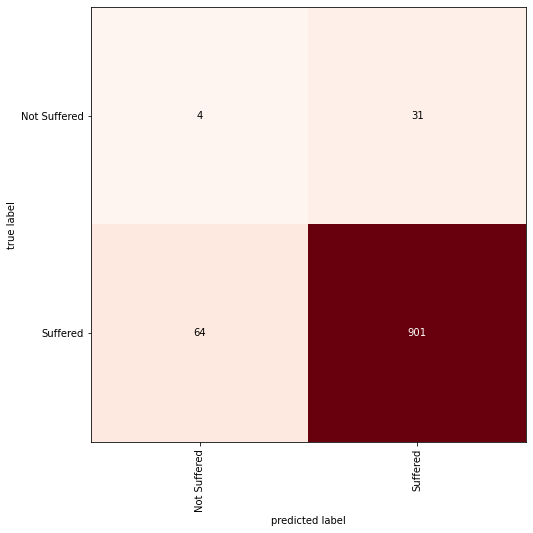

In [116]:
cm1 = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm1,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(pd.unique(df['labels']))),['Not Suffered','Suffered'])
plt.yticks(range(len(pd.unique(df['labels']))),['Not Suffered','Suffered'])
plt.xticks(rotation=90)
plt.show()

# Testing data

In [123]:
test_df = pd.read_excel('poweroutage.xlsx')


In [124]:
# Taking data from 2000 to 6000 rows for testing
test_df = test_df[2000:6000]

In [125]:
test_df = test_df[['content']]
test_df.head(20)

,content
2000,What is happening in Texas is illegal? People...
2001,OMG... you can't charge rate hikes like this a...
2002,Texas power outages are 100% the result of Rep...
2003,I know! Let's BLAME THE WINDMILLS!!!!\n\n#Tex...
2004,A @tedcruz tweet from 2019.\n#TexasWinterStorm...
2005,#TexasPowerOutages The danger for the fixed ra...
2006,"Yes, they do. @ERCOT_ISO @cpsenergy @Ron_Niren..."
2007,Beyoncé teamed up with Adidas to offer Texans ...
2008,#AOC #AlexandriaOcasioCortez\nThank you AOC fo...
2009,"""Critics have noted some of @ERCOT_ISO board d..."


In [129]:
test_df.dropna(inplace=True)

In [131]:
test_cleaned_sentences = clean_data(list(test_df['content']))
test_cleaned_sentences[0:10]

['what is happening in texas is illegal people being charged thousands of dollars for electricity ',
 'omg you can t charge rate hikes like this and expect any corporation even utilities to stay in business enron ring any bells url',
 'texas power outages are the result of republican anti regulation policy and it is failing spectacularly again url',
 'i know let s blame the windmills url',
 'a tweet from url',
 ' the danger for the fixed rate plans is if your provider folds as your contract is then nullified placing you into a risk pool and you won t like the rates charged there in the fine print of flat rate contracts are variable rates for delivery charges url',
 'yes they do url',
 'beyonc teamed up with adidas to offer texans affected by the winter storm up to in aid applications had to close due to an overwhelming response url ',
 ' thank you aoc for doing what failed to do from a native texan thank you for the million and your helping hands on the ground ',
 ' critics have noted 

In [132]:
matrix1 = CountVectorizer(max_features=200)
# X = matrix.fit_transform(Xdoc).toarray()
X1 = matrix1.fit_transform(list(test_df['content'])).toarray()

In [133]:
y_pred = classifier.predict(X1)

In [134]:
y_pred[0:10]

array(['Suffered', 'Not_Suffered', 'Suffered', 'Suffered', 'Not_Suffered',
       'Suffered', 'Suffered', 'Not_Suffered', 'Not_Suffered',
       'Not_Suffered'], dtype='<U12')

In [135]:
test_df['labels'] = y_pred

In [137]:

data_count = test_df.groupby('labels').count()
data_count['content']

labels
Not_Suffered    1098
Suffered        2901
Name: content, dtype: int64

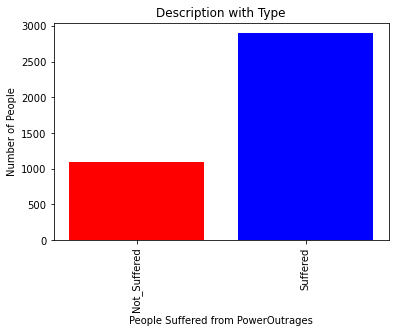

In [142]:
plt.bar(data_count.index.values,data_count['content'],color=['red', 'blue'])
plt.title('Description with Type')
plt.xlabel('People Suffered from PowerOutrages')
plt.ylabel('Number of People')
plt.plot()
plt.xticks(rotation=90)
plt.show()